In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
from matplotlib import cm
import matplotlib as mpl
from cycler import cycler
from matplotlib import rc
import scipy.stats
from sklearn.metrics import explained_variance_score
import seaborn as sns

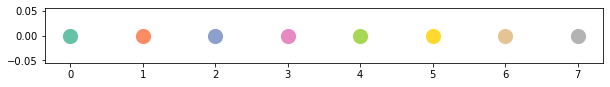

In [3]:
cmap = mpl.cm.get_cmap("Set2")
x = np.arange(0,1,0.01)
cmap_categ_raw = cmap(x)

cmap_categ = []
count = 0
for i in range(cmap_categ_raw.shape[0]):
    if i == 0:
        cmap_categ.append(cmap_categ_raw[i])
    elif np.sum(cmap_categ_raw[i] - cmap_categ[count]) != 0:
        cmap_categ.append(cmap_categ_raw[i])
        count += 1

plt.figure(figsize = (10,1))
for i in range(len(cmap_categ)):
    plt.scatter(i, 0, color=cmap_categ[i], s=200)

## Voltage fit examples

In [5]:
true4_na_mean = np.mean(np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy"))
true4_na = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]
true4_nona = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]
true4_diff = np.load("/media/hdd01/sklee/CA1_clust4-60/data/V_diff.npy")[-50000*20:].reshape(20,50000)

one4_nona_test = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/tcn_s10_h1_output.npz")["test"] + true4_na_mean
two4_nona_test = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/tcn_s10_h2_output.npz")["test"] + true4_na_mean
gru4_nona_test = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/gru_s10_h20_output.npz")["test"] + true4_na_mean

one4_diff_test = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/tcn_s10_h1_output.npz")["test"]
two4_diff_test = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/tcn_s10_h2_output.npz")["test"]
gru4_diff_test = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/gru_s10_h20_output.npz")["test"]

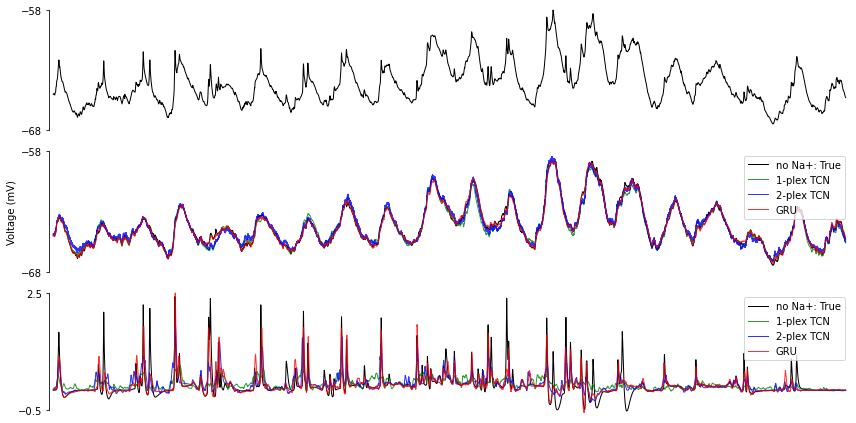

In [43]:
mpl.rcParams['pdf.fonttype'] = 42
fig, axs = plt.subplots(nrows=3, figsize = (12,6))

axs[0].plot(np.arange(0,2.4,1/5000), true4_na[-1][17000:29000], linewidth=1, color="black")
axs[0].margins(x=0.005, y=0.005)
axs[0].spines.right.set_visible(False)
axs[0].spines.top.set_visible(False)
axs[0].spines.bottom.set_visible(False)
axs[0].spines.left.set_bounds(-68,-58)
axs[0].set_yticks([-68,-58])
axs[0].set_xticks([])

axs[1].plot(np.arange(0,2.4,1/5000), true4_nona[-1][17000:29000], linewidth=1, color="black", label="no Na+: True")
axs[1].plot(np.arange(0,2.4,1/5000), one4_nona_test[-1][17000:29000], linewidth=1, color="green", label="1-plex TCN", alpha=0.8)
axs[1].plot(np.arange(0,2.4,1/5000), two4_nona_test[-1][17000:29000], linewidth=1, color="blue", label="2-plex TCN", alpha=0.8)
axs[1].plot(np.arange(0,2.4,1/5000), gru4_nona_test[-1][17000:29000], linewidth=1, color="red", label="GRU", alpha=0.8)
axs[1].legend(loc="upper right")
axs[1].margins(x=0.005, y=0.005)
axs[1].spines.right.set_visible(False)
axs[1].spines.top.set_visible(False)
axs[1].spines.bottom.set_visible(False)
axs[1].spines.left.set_bounds(-68,-58)
axs[1].set_yticks([-68,-58])
axs[1].set_xticks([])
axs[1].set_ylabel("Voltage (mV)")

axs[2].plot(np.arange(0,2.4,1/5000), true4_diff[-1][17000:29000], linewidth=1, color="black", label="no Na+: True")
axs[2].plot(np.arange(0,2.4,1/5000), one4_diff_test[-1][17000:29000], linewidth=1, color="green", label="1-plex TCN", alpha=0.8)
axs[2].plot(np.arange(0,2.4,1/5000), two4_diff_test[-1][17000:29000], linewidth=1, color="blue", label="2-plex TCN", alpha=0.8)
axs[2].plot(np.arange(0,2.4,1/5000), gru4_diff_test[-1][17000:29000], linewidth=1, color="red", label="GRU", alpha=0.8)
axs[2].legend(loc="upper right")
axs[2].margins(x=0.005, y=0.005)
axs[2].spines.right.set_visible(False)
axs[2].spines.top.set_visible(False)
axs[2].spines.bottom.set_visible(False)
axs[2].spines.left.set_bounds(-0.5,2.5)
axs[2].set_yticks([-0.5,2.5])
axs[2].set_xticks([])


fig.tight_layout()
plt.show()

## Boxplots

In [4]:
true4_na_mean = np.mean(np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy"))
true4_na = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]
true4_nona = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-20:,:50000]
true4_diff = np.load("/media/hdd01/sklee/CA1_clust4-60/data/V_diff.npy")[-50000*20:].reshape(20,50000)

one4_nona_test = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/tcn_s10_h1_output.npz")["test"] + true4_na_mean
two4_nona_test = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/tcn_s10_h2_output.npz")["test"] + true4_na_mean
gru4_nona_test = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/gru_s10_h20_output.npz")["test"] + true4_na_mean

one4_diff_test = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/tcn_s10_h1_output.npz")["test"]
two4_diff_test = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/tcn_s10_h2_output.npz")["test"]
gru4_diff_test = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/gru_s10_h20_output.npz")["test"]

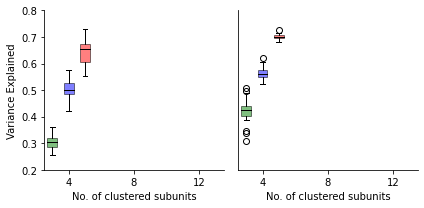

In [8]:
diff_var_exp_array = np.zeros((3,3,20))
nona_var_exp_array = np.zeros((3,3,20))

for i in range(20):
    diff_var_exp_array[0,0,i] = explained_variance_score(true4_diff[i], one4_diff_test[i])
    diff_var_exp_array[0,1,i] = explained_variance_score(true4_diff[i], two4_diff_test[i])
    diff_var_exp_array[0,2,i] = explained_variance_score(true4_diff[i], gru4_diff_test[i])
    nona_var_exp_array[0,0,i] = explained_variance_score(true4_nona[i], one4_nona_test[i])
    nona_var_exp_array[0,1,i] = explained_variance_score(true4_nona[i], two4_nona_test[i])
    nona_var_exp_array[0,2,i] = explained_variance_score(true4_nona[i], gru4_nona_test[i])
    
fig, axs = plt.subplots(ncols=2, figsize = (6,3))
colors = ["green", "blue", "red"]

# first boxplot pair
bp = axs[0].boxplot(diff_var_exp_array[0].T, positions = [1,2,3], widths = 0.6, patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for patch in bp["medians"]:
    patch.set_color("black")
    
# second boxplot pair
bp = axs[0].boxplot(diff_var_exp_array[1].T, positions = [5,6,7], widths = 0.6, patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for patch in bp["medians"]:
    patch.set_color("black")
    
# thrid boxplot pair
bp = axs[0].boxplot(diff_var_exp_array[2].T, positions = [9,10,11], widths = 0.6, patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for patch in bp["medians"]:
    patch.set_color("black")
    
axs[0].set_xticks([2,6,10])
axs[0].set_xticklabels(["4", "8", "12"])
axs[0].set_xlabel("No. of clustered subunits")
axs[0].set_ylabel("Variance Explained")
axs[0].set_ylim(0.2,0.8)
axs[0].margins(x=0.005, y=0.005)
axs[0].spines.right.set_visible(False)
axs[0].spines.top.set_visible(False)

# first boxplot pair
bp = axs[1].boxplot(nona_var_exp_array[0].T, positions = [1,2,3], widths = 0.6, patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for patch in bp["medians"]:
    patch.set_color("black")
    
# second boxplot pair
bp = axs[1].boxplot(nona_var_exp_array[1].T, positions = [5,6,7], widths = 0.6, patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for patch in bp["medians"]:
    patch.set_color("black")
    
# thrid boxplot pair
bp = axs[1].boxplot(nona_var_exp_array[2].T, positions = [9,10,11], widths = 0.6, patch_artist=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
for patch in bp["medians"]:
    patch.set_color("black")
    
axs[1].set_xticks([2,6,10])
axs[1].set_xticklabels(["4", "8", "12"])
axs[1].set_xlabel("No. of clustered subunits")
axs[1].set_ylim(0.95,1)
axs[1].margins(x=0.005, y=0.005)
axs[1].spines.right.set_visible(False)
axs[1].spines.top.set_visible(False)
axs[1].spines.top.set_visible(False)

fig.tight_layout()
plt.show()

## Nonlin + Kernels

In [10]:
two4_diff_ekern = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/tcn_s10_h2_output.npz")["e_kern"]
two4_diff_ikern = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/tcn_s10_h2_output.npz")["i_kern"]
two4_diff_nonlin = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/tcn_s10_h2_output.npz")["nonlin_in"]

print(two4_diff_ekern.shape)
print(two4_diff_nonlin.shape)

(10, 2, 500)
(20, 10, 2, 50000)


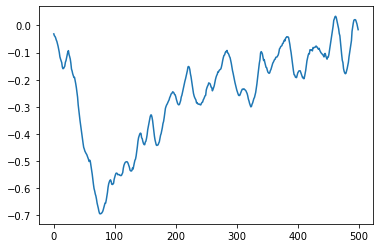

In [27]:
plt.plot(two4_diff_ekern[6,1])